# Exploratory data analysis - features

## TODO

Now that our data is clean and ready, we will take a closer look on it.

In this section, we will cover:

- Analysis of sample distribution
- Reducing skew
- Outliers
- Balancing the data

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import aux_functions as aux

In [2]:
# loading the data and testing our script
df_old = pd.read_csv('data/df_transformed.csv')
df = pd.read_csv('data/Auto1-DS-TestData.csv')
df = aux.clean_data(df)

for col_type in ['object', 'int64', 'float64']:
    test = (df.select_dtypes(col_type).describe() != df_old.select_dtypes(col_type).describe())
    if test.any().sum():
        print('not equal on ', col_type)
    else:
        print('all ok with', col_type)

all ok with object
all ok with int64
all ok with float64


## Analysis of sample distribution

The goal here is to understand what distribution the variable prices follow.

Also, understanding the behavior of the data is essential for building good prediction models.

In [3]:
df.price.describe()

count      193.000000
mean     13285.025907
std       8089.082886
min       5118.000000
25%       7738.000000
50%      10245.000000
75%      16515.000000
max      45400.000000
Name: price, dtype: float64

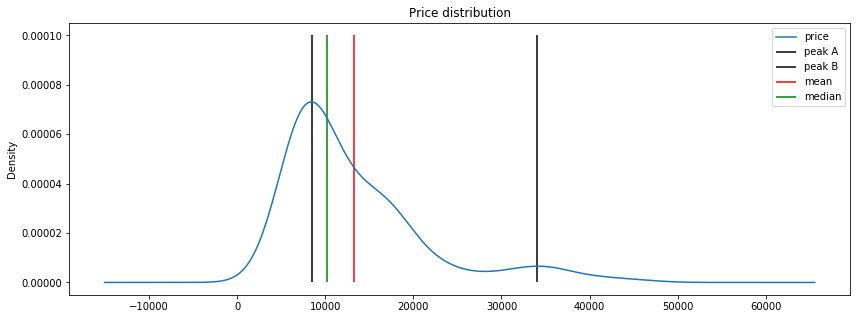

In [4]:
figsize = (14, 5)
df.price.plot(kind='kde', legend=True, figsize=figsize, title='Price distribution')
plt.vlines(8500, 0, .0001, label='peak A')
plt.vlines(34000, 0, .0001, label='peak B')
plt.vlines(df.price.mean(), 0, .0001, color='r', label='mean')
plt.vlines(df.price.median(), 0, .0001, color='g', label='median')
plt.legend()